In [1]:
## QTL analysis
## Bring in needed mods
import pandas as pd, numpy as np, statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
%matplotlib inline

## Bring in needed ftn for QTL analysis
from scipy.stats import kruskal

## Write function for QTL analysis
def crypto_kruskal(site,pheno):
    """
    For the data from the C. deneoformans cross, a non-parametric ANOVA.
    Here we are looking for differences between the median phenotypes of group 0 and 1. 
    """
    pheno = pheno.dropna();assert len(pheno) > 0;
    site = site[pheno.dropna().index.tolist()];
    assert len(site) == len(pheno)
    try:
        pval = -np.log10(kruskal(np.array(pheno)[np.array(site) == 0],
                                        np.array(pheno)[np.array(site) == 1],
                                        nan_policy='omit')[1])
    except ValueError:
        pval = np.nan
    return pval

In [10]:
## Set date of phenotype data to use
filedate = 'Jan82019'

In [11]:
## set path to file, should in in the words, "curation_baselined_median21_AUC_Xstrain.csv'
file_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_gompertz.csv'%(
    filedate)

In [12]:
## Set path to genotype data
geno_path = '../FILES/CDx-ill-SNP-INDEL-df-104-blocked.csv'

In [13]:
## Load data
data = pd.read_csv(file_path,index_col=0)

In [14]:
## Check value of parental strain SS-A837
data[(data.strain=='SS-A837') & (data.temp==37) & (data.amphB==0.125)]

,date,row,column,plate,temp,strain,amphB,length,Instrument,saturatedOD,premedia,A,u,l,mss,AUC
2940,Aug182017,e,7,2,37,SS-A837,0.125,72,Sunrise,1.45,YPD,1.1444,0.089728,45.648495,0.002451,21.315984
2941,Sep82017,e,7,2,37,SS-A837,0.125,72,Loaner,1.52,YPD,0.7374,0.036949,53.695788,0.000782,5.890259
2942,Sep232017,e,7,2,37,SS-A837,0.125,72,Sunrise,1.33,YPD,0.6058,0.030978,53.642742,0.000406,4.940951
2943,Sep272017,e,7,2,37,SS-A837,0.125,72,Sunrise,1.39,YPD,0.9960,0.067400,54.652440,0.001935,8.994292


In [15]:
## What is the shape of the dataframe
data.shape

(5220, 16)

In [16]:
## Check for nan's
data.dropna(axis=0,how='any').shape

(4014, 16)

In [17]:
## Bring in genotype data
bgeno = pd.read_csv(geno_path)

In [18]:
bgeno.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,SS-B598,SS-B565,SS-B600,SS-B574,SS-B872_cor,SS-B873_cor,SS-B360,SS-B397,SS-B564,SS-B382
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
## Check its shape
bgeno.shape

(92103, 125)

In [20]:
unique_blocks = bgeno.Block.unique()

In [21]:
len(unique_blocks)

3108

In [22]:
## Gather a list of the chromosomes
chrlist = sorted(bgeno.Chrom.unique());

In [23]:
## make sure there are 14
assert len(chrlist) >= 14

In [24]:
## Chrom should be the edge of the info in geno df
bgcol = bgeno.columns.tolist()
## gather bgeno info columsn
bginfoix = bgcol.index('Block')+1
## Gather info from bgeno
bgeno_info = bgcol[:bginfoix]
## Gather strain names
bgeno_strains = bgcol[bginfoix:]
## How many?
len(bgeno_strains)

104

In [25]:
## Rename the strains here to match those phenotyped by DM
#bgeno_strains = []
#for s in bgeno_original_strains:
#    if len(s.split('_Cor')) > 1:
#        bgeno_strains.append(s.split('_Cor')[0]+'_cor')
#    elif s in ['SS-A853']:
#        bgeno_strains.append('XL280alpha')
#    elif s in ['SS-B830']:
#        bgeno_strains.append('XL280a')
#    else:
#        bgeno_strains.append(s)

In [26]:
## Check first 5 of new names
bgeno_strains[:5]

['SS-B407', 'SS-B316', 'SS-B898_cor', 'SS-B369', 'SS-B997']

In [27]:
## Assign new names to bgeno columns
bgeno.columns = bgeno_info + bgeno_strains

In [28]:
## Save data back with new names
#bgeno.to_csv(geno_path)

In [29]:
## How many haplotypes are in the geno df
print([len(bgeno[bgeno.Chrom==chrom]) for chrom in chrlist])

[11530, 7111, 9696, 8893, 7027, 7334, 6633, 5878, 5874, 5021, 5407, 4190, 4011, 3498]


In [30]:
## Find strains in both our phenotype and genotype data
tecan_strains = data.strain.unique().tolist()

In [31]:
## Take these segrants that are in the genotype data
segs = [s for s in tecan_strains if s in bgeno_strains]

In [32]:
## How many do we have?
len(segs)

104

In [33]:
## make an index to these data 
segs_in_data = data.strain.isin(segs); 

In [34]:
## Take the phenotype w/ strains in genotype data
phenotypes = data.loc[segs_in_data].copy() 

In [35]:
## Print the shape of the phenotyep data
phenotypes.shape

(4560, 16)

In [36]:
## Check our work, assert that we didn't leave any strains behind! 
assert len(phenotypes.strain.unique()) == len(segs)

In [48]:
import seaborn as sns

In [49]:
from scipy.stats import chisquare
## Set tick style
sns.set(style="ticks", context="talk")
plt.style.use(['tableau-colorblind10'])

In [204]:
rt_amph = phenotypes[(phenotypes.temp==30) & 
            (phenotypes.amphB==0.175)].groupby('strain').aggregate('median')
rt_amph['grew'] = [0 if a == 0 else 1 for a in rt_amph.A]

In [205]:
ht_amph = phenotypes[(phenotypes.temp==37) & 
            (phenotypes.amphB==0.175)].groupby('strain').aggregate('median')
ht_amph['grew'] = [0 if a == 0 else 1 for a in ht_amph.A]

In [208]:
ht_amph['grew'].shape

(104,)

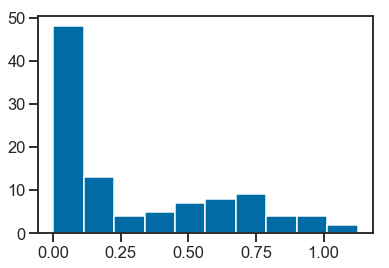

In [220]:
plt.hist(rt_amph.A);

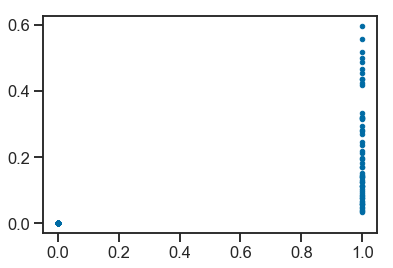

In [211]:
plt.plot(ht_amph['grew'].values,ht_amph['A'].values, '.');

In [59]:
bgeno.shape

(92103, 125)

In [63]:
recomb_blocks = bgeno.Block.unique()

In [64]:
test_ix = np.array([bgeno[(bgeno.Block == b)].index.tolist()[0] 
                    for b in recomb_blocks])

In [136]:
block_chip = []
for i in test_ix:
    temp = pd.concat([bgeno.loc[i,segs],ht_amph['grew']],axis=1)
    temp.columns = ['block','grew']
    temp.reset_index(inplace=True)
    block_chip.append(chisquare(temp.groupby(['block',
                'grew']).aggregate('count'
                )['strain'].values).pvalue)

In [214]:
bgenoc = bgeno.merge(pd.DataFrame([recomb_blocks,block_chip],index=['Block','chipval']).T,on='Block')

In [212]:
block_chip_rt = []
for i in test_ix:
    temp = pd.concat([bgeno.loc[i,segs],rt_amph['grew']],axis=1)
    temp.columns = ['block','grew']
    temp.reset_index(inplace=True)
    block_chip_rt.append(chisquare(temp.groupby(['block',
                'grew']).aggregate('count'
                )['strain'].values).pvalue)

In [215]:
bgenoc = bgenoc.merge(pd.DataFrame([recomb_blocks,block_chip_rt],
                                   index=['Block','chipvalrt']).T,on='Block')

In [148]:
chrlist = bgenoc.Chrom.unique()
clens = [bgenoc[(bgenoc.Chrom==ch)].Pos.max() for ch in chrlist]
cumpos = [0] + list(np.cumsum(clens[:-1]))
chrom_midpts = 0.5 * np.sum(np.array([a 
                    for a in zip([0]+list(np.cumsum(clens)),
                            np.cumsum(clens))]),axis=1)

In [157]:
bgenoc[(bgenoc.chipval==bgenoc['chipval'].min())]['Block'].unique()

array([1858, 1859])

In [165]:
cross_info = pd.read_csv('../FILES/OLD/OCT2018/CDx_PB_Ill_Sample_Info.csv',index_col=0)

In [180]:
cross_info[cross_info.Code<3].head()

,PB-name,Code,PB-index,Ill-index,Ill-name,Aneuploidy
Strain,,,,,,
SS-B358,RBB31_SS-B358_TCCGGAG-CAGGACG-CR_Canu_polished...,2,1,40,SS-B358-24,0
SS-B565,SHSB3_05-SS-B565_CTGAAGC-AGGCGAA-CR_Canu_polis...,2,2,115,SS-B565-66,0
SS-B368,RBB35_SS-B368_CGCTCAT-CCTATCC-CR_Canu_polished...,2,3,27,SS-B368-28,0
SS-C030,RBB132_SS-C030_GTTTCG-CR_Canu_polished_JRW-5,1,4,73,SS-C030-5,0
SS-B575,SHSB3_09-SS-B575_TAATGCG-TATAGCC-CR_Canu_polis...,2,5,54,SS-B575-70,0


In [188]:
segs_to_use = cross_info[(cross_info.Code<3) & cross_info.index.isin(segs)].index.tolist()

In [199]:
i = 1858
temp = pd.concat([bgeno.loc[i,segs_to_use],ht_amph['grew'].loc[segs_to_use].T,
                  cross_info.T[segs_to_use].T['Code']],axis=1)
temp.columns = ['block','grew','code']
temp.reset_index(inplace=True)
temp.groupby(['grew','code','block']).aggregate('count')

index
grew code block       
0    1    0.0       16
          1.0        3
     2    0.0        8
          1.0       19
1    1    0.0       20
          1.0        7
     2    0.0       11
          1.0       17

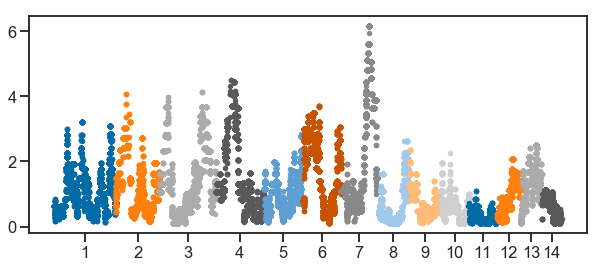

In [152]:
fig, ax = plt.subplots(1,1,figsize=(10,4),
                       sharex=True,sharey=True)
for c,ch in enumerate(chrlist):
    temp = bgenoc[(bgenoc.Chrom==ch)][['Pos','chipval']]
    plt.plot(temp.Pos.values+cumpos[c],-np.log10(temp['chipval'].values),'.')
ax.set_xticks(chrom_midpts);
ax.set_xticklabels([str(i) for i in range(1, len(clens)+1)]);

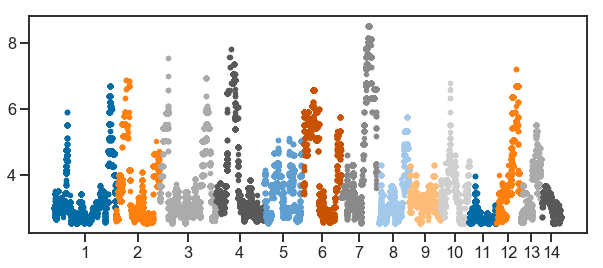

In [217]:
fig, ax = plt.subplots(1,1,figsize=(10,4),
                       sharex=True,sharey=True)
for c,ch in enumerate(chrlist):
    temp = bgenoc[(bgenoc.Chrom==ch)][['Pos','chipvalrt']]
    plt.plot(temp.Pos.values+cumpos[c],-np.log10(temp['chipvalrt'].values),'.')
ax.set_xticks(chrom_midpts);
ax.set_xticklabels([str(i) for i in range(1, len(clens)+1)]);

In [219]:
hht_amph = phenotypes[(phenotypes.temp==39) & 
            (phenotypes.amphB==0.125)].groupby('strain').aggregate('median')
hht_amph['grew'] = [0 if a == 0 else 1 for a in hht_amph.A]

In [ ]:
block_chip_hht = []
for i in test_ix:
    temp = pd.concat([bgeno.loc[i,segs],hht_amph['grew']],axis=1)
    temp.columns = ['block','grew']
    temp.reset_index(inplace=True)
    block_chip_htt.append(chisquare(temp.groupby(['block',
                'grew']).aggregate('count'
                )['strain'].values).pvalue)

In [32]:
from scipy.stats import variation as cvar

In [36]:
## group and aggregate
pheno_group_cv = phenotypes.groupby(['temp','amphB','strain']).agg({'AUC':[cvar],
                                                   'A':[cvar],
                                                   'l':[cvar],
                                                   'u':[cvar]
                                                  })
pheno_cv = pheno_group_cv.reset_index()
pheno_cv.columns = ['temp','amphB','strain','AUC_cvar',
                    'A_cvar','l_cvar','u_cvar']

/Users/croth/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:999: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis) / a.mean(axis)


In [37]:
pheno_cv.head()

,temp,amphB,strain,AUC_cvar,A_cvar,l_cvar,u_cvar
0,30,0.0,SS-A837,0.030384,0.006406,0.094049,0.062199
1,30,0.0,SS-B307,0.096642,0.085626,0.626604,0.079571
2,30,0.0,SS-B310,0.089354,0.092212,0.778566,0.113283
3,30,0.0,SS-B311,0.069805,0.039590,0.356238,0.187653
4,30,0.0,SS-B312,0.173980,0.157775,0.343311,0.202887


In [39]:
import seaborn as sns

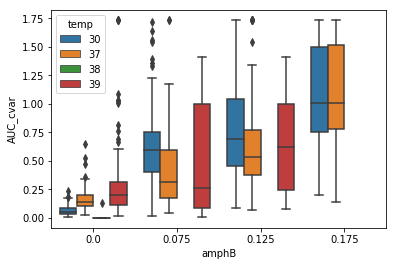

In [40]:
sns.boxplot(y='AUC_cvar',x='amphB',hue='temp',data=pheno_cv);

In [35]:
pheno_group_cv.head()

AUC         A         l         u
                   variation variation variation variation
temp amphB strain                                         
30   0.0   SS-A837  0.030384  0.006406  0.094049  0.062199
           SS-B307  0.096642  0.085626  0.626604  0.079571
           SS-B310  0.089354  0.092212  0.778566  0.113283
           SS-B311  0.069805  0.039590  0.356238  0.187653
           SS-B312  0.173980  0.157775  0.343311  0.202887

In [29]:
## group and aggregate
pheno_group = phenotypes.groupby(['temp','amphB','strain']).agg({'AUC':[np.mean,np.median],
                                                   'A':[np.mean,np.median],
                                                   'l':[np.mean,np.median],
                                                   'u':[np.mean,np.median]
                                                  })

In [30]:
pheno_group.shape

(1248, 8)

In [31]:
pheno_group.tail()

AUC                    A                 l  \
                            mean     median      mean median       mean   
temp amphB strain                                                         
39   0.125 SS-C272      0.000000   0.000000  0.000000  0.000  72.000000   
           SS-C290      0.000000   0.000000  0.000000  0.000  72.000000   
           SS-C291      0.000000   0.000000  0.000000  0.000  72.000000   
           XL280a      12.615084  13.734747  0.410067  0.384  25.980494   
           XL280alpha   3.589968   3.286105  0.130333  0.128  27.758363   

                                         u            
                          median      mean    median  
temp amphB strain                                     
39   0.125 SS-C272     72.000000  0.000000  0.000000  
           SS-C290     72.000000  0.000000  0.000000  
           SS-C291     72.000000  0.000000  0.000000  
           XL280a      24.468709  0.015819  0.015313  
           XL280alpha  30.254681  0.004381  0.004490

In [66]:
pheno_agg = pheno_group.reset_index()
pheno_agg.columns = ['temp','amphB','strain','AUC_mean',
                     'AUC_median','A_mean','A_median',
                    'l_mean','l_median','u_mean','u_median']

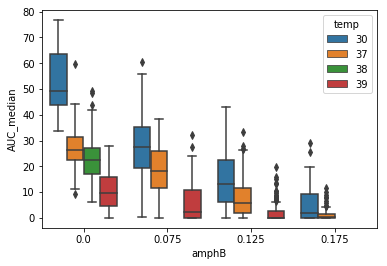

In [69]:
sns.boxplot(y='AUC_median',x='amphB',hue='temp',data=pheno_agg);

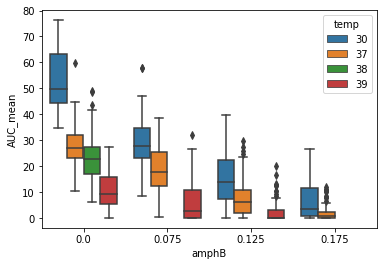

In [70]:
sns.boxplot(y='AUC_mean',x='amphB',hue='temp',data=pheno_agg);

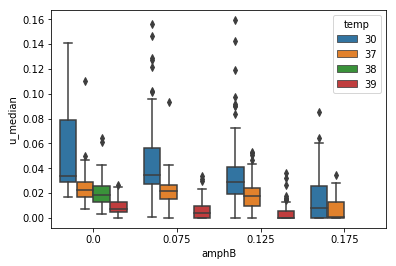

In [72]:
sns.boxplot(y='u_median',x='amphB',hue='temp',data=pheno_agg);

In [73]:
## Save this filtered data frame 
#phenotypes.to_csv('../FILES/'+file_path.split('/')[-1].split('.csv')[0]+'_noclone.csv')

In [74]:
## Set phenotype of interest
#pheno_look_at = 'median_AUC'

In [41]:
to_test_ix = [bgeno[(bgeno.Block == b)].index.tolist()[0] 
              for b in unique_blocks]

In [42]:
len(to_test_ix)

3108

In [50]:
phenos = ['AUC']#,'A','l','u']
metric = ['variation']

In [44]:
temps = phenotypes.temp.sort_values().unique()

In [51]:
## conduct QTL analysis
temp_pvals = []                                          ## initialize list for dataframes
pval_cols = []                                           ## "..." for new pvalue column names
for i,t in enumerate(temps):                             ## For each temp
    for j,d in enumerate(phenotypes[(phenotypes.temp==t)
                        ].amphB.sort_values().unique()): ## For durg in temp
        for p in phenos:
            for m in metric:
                pval_cols.append(str(t)+'C_'+str(d)+'_'+p+'_'+m) ## append colu name
                temp = pheno_group_cv.T[(t,d)].T[(p,m)]
                temp_pval = bgeno.iloc[to_test_ix,bginfoix:].apply(crypto_kruskal,
                                  axis=1,args=[temp])    ## conduct QTL analysis
                temp_pvals.append(temp_pval)             ## Append pvalue

In [52]:
## concat dataframes
pvaldf = pd.concat([bgeno.loc[to_test_ix,'Block']]+temp_pvals,axis=1)

In [53]:
pvaldf.columns = ['Block'] + pval_cols

In [54]:
pvaldf.head()

,Block,30C_0.0_AUC_variation,30C_0.075_AUC_variation,30C_0.125_AUC_variation,30C_0.175_AUC_variation,37C_0.0_AUC_variation,37C_0.075_AUC_variation,37C_0.125_AUC_variation,37C_0.175_AUC_variation,38C_0.0_AUC_variation,39C_0.0_AUC_variation,39C_0.075_AUC_variation,39C_0.125_AUC_variation
0,0,0.607863,0.308081,1.127824,0.112452,0.149290,0.117268,0.565377,1.250539,0.428101,0.238415,0.251812,0.605523
232,1,0.719950,0.124748,1.230504,0.106024,0.217147,0.024533,0.570389,1.055392,0.417390,0.355531,0.128178,0.894548
249,2,0.578274,0.074398,1.334481,0.040701,0.537659,0.087684,0.633719,0.867698,0.461890,0.527635,0.225548,1.220163
252,3,0.685524,0.038969,1.202904,0.102590,0.603814,0.012627,0.565765,1.010892,0.439078,0.558480,0.427175,1.212120
254,4,0.299443,0.023187,1.078766,0.056314,0.946600,0.016106,0.586548,1.069415,0.450335,0.594274,0.231432,1.443681


In [55]:
bgenop = bgeno.merge(pvaldf,on=['Block'])

In [56]:
bgenop.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,30C_0.125_AUC_variation,30C_0.175_AUC_variation,37C_0.0_AUC_variation,37C_0.075_AUC_variation,37C_0.125_AUC_variation,37C_0.175_AUC_variation,38C_0.0_AUC_variation,39C_0.0_AUC_variation,39C_0.075_AUC_variation,39C_0.125_AUC_variation
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,1.127824,0.112452,0.14929,0.117268,0.565377,1.250539,0.428101,0.238415,0.251812,0.605523
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,1.127824,0.112452,0.14929,0.117268,0.565377,1.250539,0.428101,0.238415,0.251812,0.605523
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,1.127824,0.112452,0.14929,0.117268,0.565377,1.250539,0.428101,0.238415,0.251812,0.605523
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,1.127824,0.112452,0.14929,0.117268,0.565377,1.250539,0.428101,0.238415,0.251812,0.605523
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,1.127824,0.112452,0.14929,0.117268,0.565377,1.250539,0.428101,0.238415,0.251812,0.605523


In [57]:
## Make the saving path
savepath = '../FILES/'+file_path.split('/')[-1].split('.csv')[0]+'_var_pvalues.csv'

In [58]:
## Print the save path
savepath

'../FILES/Tecan_qtlruns_Dec172018_curated_baselined_gompertz_var_pvalues.csv'

In [59]:
## Save data
bgenop.to_csv(savepath)

In [63]:
## Set mid points


In [67]:
plt.style.use(['dark_background','tableau-colorblind10'])

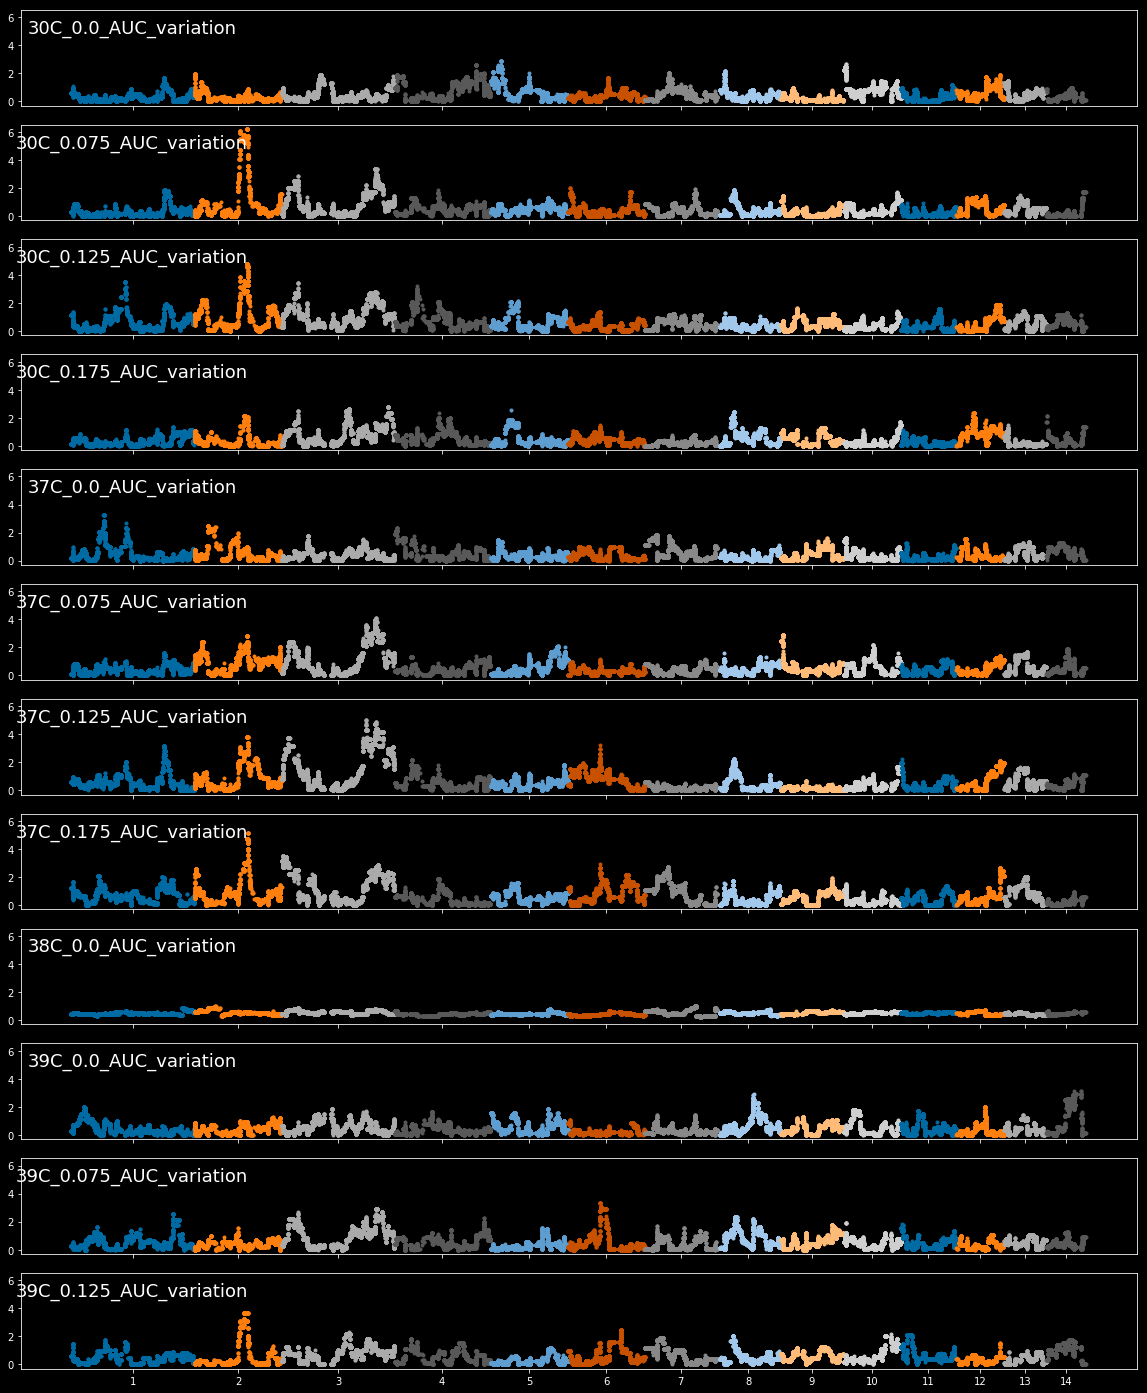

In [68]:
fig, ax = plt.subplots(len(pval_cols),1,figsize=(20,25),
                       sharex=True,sharey=True)
for p,pheno in enumerate(pval_cols):
    plt.sca(ax[p]);
    plt.title(pheno,x=0.1,y=0.7,fontsize=18)
    for c,ch in enumerate(chrlist):
        temp = bgenop[(bgenop.Chrom==ch)][['Pos',pheno]]
        plt.plot(temp.Pos.values+cumpos[c],temp[pheno].values,'.')
ax[-1].set_xticks(chrom_midpts);
ax[-1].set_xticklabels([str(i) for i in range(1, len(clens)+1)]);

In [ ]:
## Variance explained! 
## First approximation
phenotypes.shape

In [ ]:
i = 4
max_con = pvaldf[pvaldf.columns.tolist()[10:]].max().index[i]
max_pval = pvaldf[pvaldf.columns.tolist()[10:]].max()[i]

In [ ]:
max_con

In [ ]:
max_pval_ix = pvaldf[pvaldf[max_con] == max_pval].index
max_pval_ix

In [ ]:
bgeno.loc[max_pval_ix]

In [ ]:
max_genos = bgeno.loc[[max_pval_ix[0]]][bgeno.columns.tolist()[10:]]
max_genos.index = ['geno']

In [ ]:
max_phenos = phenotypes[(phenotypes.temp==int(max_con.split('C_')[0])) & 
           (phenotypes.amphB==float(max_con.split('C_')[-1]))]

In [ ]:
max_geno_pheno_df = pd.concat([max_phenos,max_genos.T],axis=1,sort=True)

In [ ]:
#plt.hist(np.log(max_geno_pheno_df.median_AUC.values));

In [ ]:
#max_geno_pheno_df['log_auc'] = np.log(max_geno_pheno_df.median_AUC)

In [ ]:
max_geno_pheno_df.tail()

In [ ]:
model = ols('median_AUC ~ C(geno)',data=max_geno_pheno_df)

In [ ]:
res = model.fit()

In [ ]:
-np.log10(res.pvalues)

In [ ]:
res.summary()

In [ ]:
import seaborn as sns

In [ ]:
max_geno_pheno_df['geno_shift'] = abs(max_geno_pheno_df['geno'] - 1)

In [ ]:
ax = sns.lmplot(x='geno_shift',y='median_AUC',x_jitter=.2,data=max_geno_pheno_df);
plt.xticks([0,1],['431','XL280'],fontsize=18)
plt.xlabel('Allele',fontsize=16)
plt.ylabel('Median\nArea Under the Curve',fontsize=18);
plt.plot([0],max_geno_pheno_df.loc['SS-A837']['median_AUC'],'o',ms=10,color='red');
plt.plot([1,1],max_geno_pheno_df.loc[['XL280a','XL280alpha']]['median_AUC'],'ko',ms=10);
plt.savefig('/Users/croth/Desktop/CRYPTO_QTL/FIGURES/QTL2_AUC_distirbutions.png',
            dpi=300);

In [ ]:
plt.hist(res.resid);